# Exploratory data analysis (case study Nice)
in this notebook we are going to merge the observation of tide and wave parameters and explore the data.

In [ ]:
# importing libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

sns.set_style("darkgrid")

# Merging data

In [ ]:
# importing tide data
tide_df = pd.read_csv("../data/treated_data/Nice/Nice_tide_hourly.csv", index_col= 0)
#convert the index type
tide_df.index = pd.to_datetime(tide_df.index)

tide_df.head()

,tide
time,
1981-07-03 23:00:00,0.569
1981-07-04 00:00:00,0.519
1981-07-04 01:00:00,0.459
1981-07-04 02:00:00,0.399
1981-07-04 03:00:00,0.349


In [ ]:
# importing wave data
wave_df = pd.read_csv("../data/treated_data/Nice/Nice_wave_hourly.csv", index_col= 0)
#convert the index type
wave_df.index = pd.to_datetime(wave_df.index)

wave_df.head()

,ETAMAX,ETAMIN,HM0,TP,T02,TE
DateHeure,,,,,,
2002-06-04 14:00:00,0.47,0.49,0.48,3.2,3.0,3.5
2002-06-04 15:00:00,0.83,0.71,0.80,3.9,3.4,3.7
2002-06-04 16:00:00,1.31,0.96,1.03,4.4,3.7,4.0
2002-06-04 17:00:00,0.91,0.98,1.04,4.7,3.9,4.3
2002-06-04 18:00:00,1.51,1.10,1.03,4.7,3.8,4.2


In [ ]:
# merging the two dataframe on outter
nice_df = tide_df.join(wave_df, how="inner")
nice_df

,tide,ETAMAX,ETAMIN,HM0,TP,T02,TE
2002-06-04 14:00:00,0.479,0.470,0.490,0.480,3.20,3.00,3.5
2002-06-04 15:00:00,0.489,0.830,0.710,0.800,3.90,3.40,3.7
2002-06-04 16:00:00,0.499,1.310,0.960,1.030,4.40,3.70,4.0
2002-06-04 17:00:00,0.499,0.910,0.980,1.040,4.70,3.90,4.3
2002-06-04 18:00:00,0.499,1.510,1.100,1.030,4.70,3.80,4.2
...,...,...,...,...,...,...,...
2016-03-07 04:00:00,0.637,0.465,0.430,0.525,7.35,5.65,6.8
2016-03-07 05:00:00,0.680,0.545,0.475,0.530,8.05,5.80,6.8
2016-03-07 06:00:00,0.702,0.470,0.510,0.575,7.95,5.80,6.9
2016-03-07 07:00:00,0.698,0.465,0.450,0.555,8.30,5.60,6.7


In [ ]:
nice_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195245 entries, 1981-07-03 23:00:00 to 2021-02-28 23:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tide    188552 non-null  float64
 1   ETAMAX  78720 non-null   float64
 2   ETAMIN  78720 non-null   float64
 3   HM0     76455 non-null   float64
 4   TP      76455 non-null   float64
 5   T02     76455 non-null   float64
 6   TE      76455 non-null   float64
dtypes: float64(7)
memory usage: 11.9 MB


## saving the dataset

In [ ]:
# saving the dataset
nice_df.to_csv("../data/treated_data/Nice/Nice_all_data_hourly.csv")

# EDA

## Evolution of the parameters

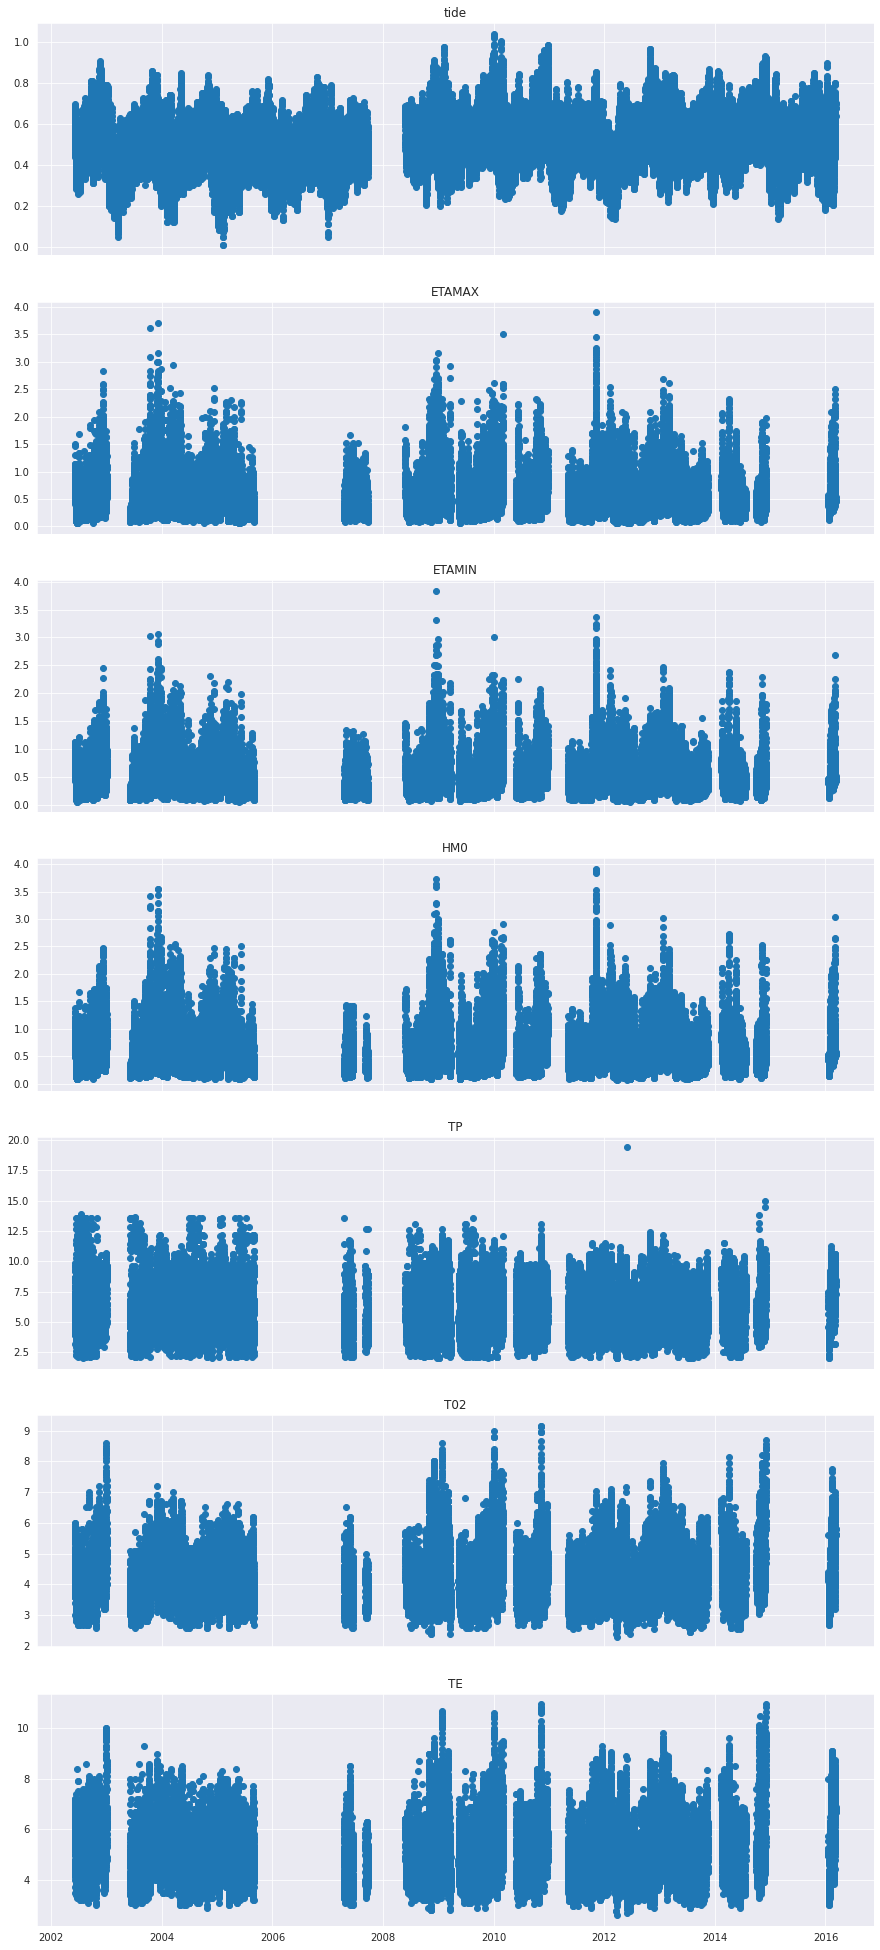

In [ ]:
fig, ax = plt.subplots(nice_df.shape[1], figsize=(15, 5 * nice_df.shape[1]), sharex=True)

for ind in range(nice_df.shape[1]):
    ax[ind].scatter(nice_df.index.values, nice_df.iloc[:,ind])
    ax[ind].set_title(nice_df.columns[ind])

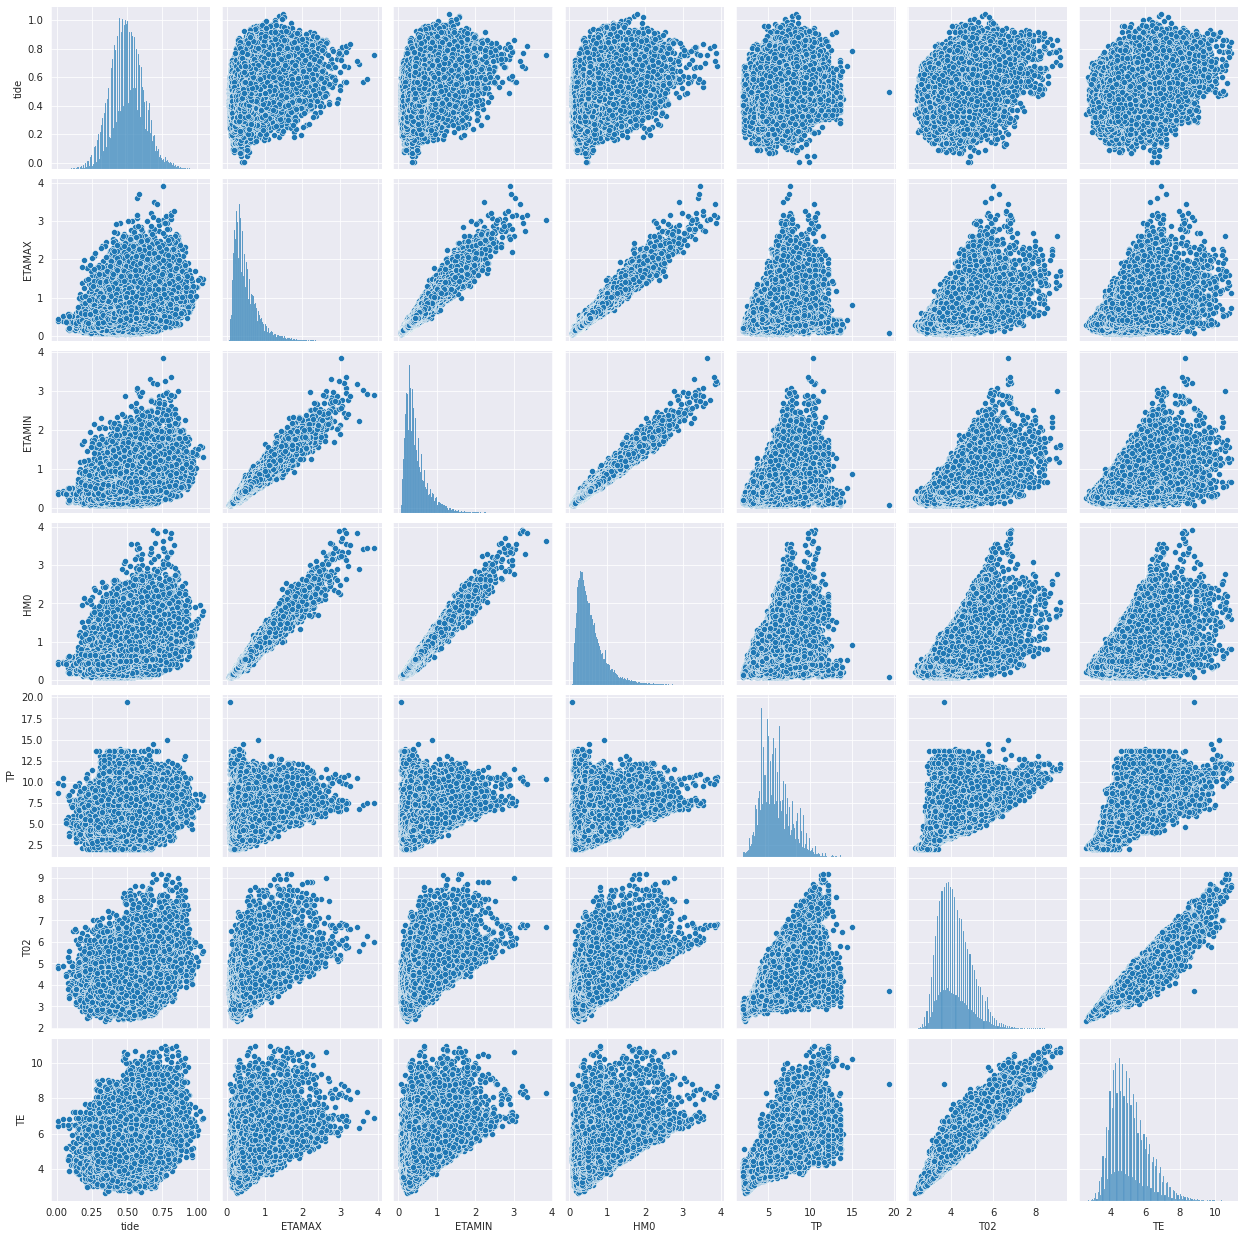

In [ ]:
sns.pairplot(nice_df)

<AxesSubplot:>

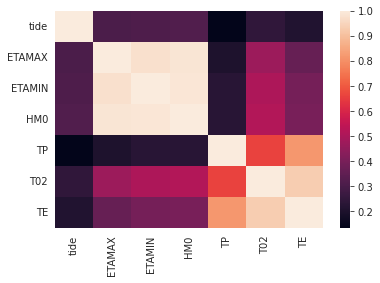

In [ ]:
sns.heatmap(nice_df.corr())

## Analysis
we observe that when that:
- there's an high correlation between significant wave height and the elevation,
- the values of tide are increasing with time, which can indicate an increasing in the sea level in Nice,

# EDA in case of storm
In this part we are gonna analyse our data by including the date of storm, in order to see if there's a significant difference between variables in case of storm.

In [ ]:
# list of storms in Nice,
# this data is extracted from the georisque of france
storm_date = [("31/10/2003", "02/11/2003"),
               ("30/11/2008", "02/12/2008"),
               ("22/12/2009", "29/12/2009"),
               ("01/01/2010", "02/01/2010"),
               ("19/02/2010", "20/02/2010"),
               ("04/05/2010", "05/05/2010"),
               ("08/11/2011", "09/11/2011")]


#create a dataframe of storms
storm_df = pd.DataFrame(storm_date, columns=["begin_date", "end_date"])

#convert the type of this storms
storm_df["begin_date"] = pd.to_datetime(storm_df["begin_date"], format="%d/%m/%Y")
storm_df["end_date"] = pd.to_datetime(storm_df["end_date"], format="%d/%m/%Y")

#data verification
storm_df

,begin_date,end_date
0,2003-10-31,2003-11-02
1,2008-11-30,2008-12-02
2,2009-12-22,2009-12-29
3,2010-01-01,2010-01-02
4,2010-02-19,2010-02-20
5,2010-05-04,2010-05-05
6,2011-11-08,2011-11-09


In [ ]:
# create a copy of out dataframe
nice_storms = nice_df.copy()

# create a new column that will include flag on the type of observation
# RAS :  "rien a signler"
# RISQUE : "Risque de tempete"
# TEMP : "Tempete"

#initialize our data with RAS values
nice_storms["storm_flag"] = ["RAS"]*nice_storms.shape[0]

In [ ]:
#now using the storm dataframe we update the value of the storm column
for ind in range(storm_df.shape[0]):
    # begining of the storm
    beg = storm_df.loc[ind, "begin_date"]
    # end of the storm
    end = storm_df.loc[ind, "end_date"]

    # delta day in order to see if there's a signficant difference between the storm and the other days
    delta_day = datetime.timedelta(hours = 24)

    # replace the value with RISQUE value
    nice_storms.loc[beg - delta_day: end + delta_day, "storm_flag"] = "RISQUE"

    # replace the value with TEMP value
    nice_storms.loc[beg: end, "storm_flag"] = "TEMP"

In [ ]:
# number of observations by storm flag
nice_storms["storm_flag"].value_counts()

RAS       112600
RISQUE       935
TEMP         367
Name: storm_flag, dtype: int64

In [ ]:
nice_storms.describe()

,tide,ETAMAX,ETAMIN,HM0,TP,T02,TE
count,113902.000000,72481.000000,72481.000000,70335.000000,70335.000000,70335.000000,70335.000000
mean,0.504052,0.518255,0.492879,0.576466,5.907793,4.224254,5.134973
std,0.117221,0.345469,0.316045,0.385925,1.816331,0.785567,1.062932
min,0.009000,0.060000,0.060000,0.065000,2.000000,2.300000,2.600000
25%,0.425000,0.285000,0.280000,0.310000,4.600000,3.650000,4.350000
50%,0.500000,0.425000,0.410000,0.470000,5.600000,4.100000,4.950000
75%,0.579000,0.645000,0.615000,0.730000,7.000000,4.700000,5.750000
max,1.041000,3.905000,3.840000,3.910000,19.400000,9.150000,10.950000


## Data viz

<AxesSubplot:xlabel='storm_flag', ylabel='tide'>

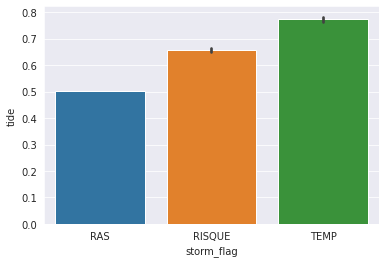

In [ ]:
sns.barplot(data = nice_storms, x="storm_flag", y="tide")

<AxesSubplot:xlabel='storm_flag', ylabel='HM0'>

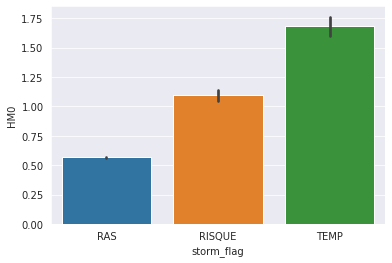

In [ ]:
sns.barplot(data = nice_storms, x="storm_flag", y="HM0")

<AxesSubplot:xlabel='storm_flag', ylabel='ETAMAX'>

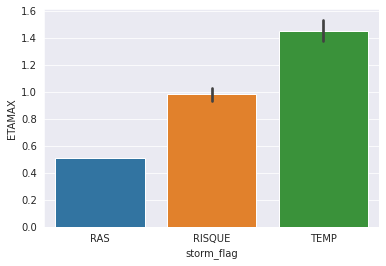

In [ ]:
sns.barplot(data = nice_storms, x="storm_flag", y="ETAMAX")

<AxesSubplot:xlabel='storm_flag', ylabel='ETAMIN'>

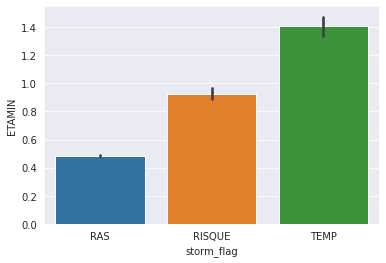

In [ ]:
sns.barplot(data = nice_storms, x="storm_flag", y="ETAMIN")

<AxesSubplot:xlabel='storm_flag', ylabel='TP'>

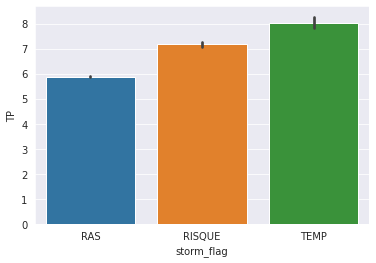

In [ ]:
sns.barplot(data = nice_storms, x="storm_flag", y="TP")

<AxesSubplot:xlabel='storm_flag', ylabel='T02'>

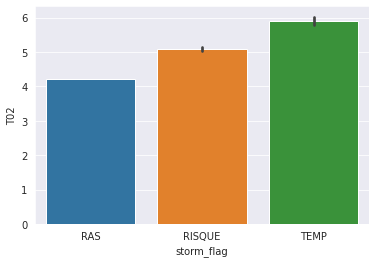

In [ ]:
sns.barplot(data = nice_storms, x="storm_flag", y="T02")

<AxesSubplot:xlabel='storm_flag', ylabel='TE'>

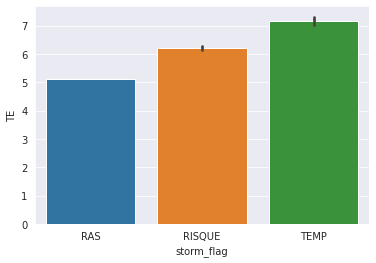

In [ ]:
sns.barplot(data = nice_storms, x="storm_flag", y="TE")

<AxesSubplot:>

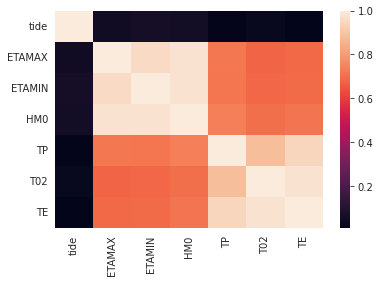

In [ ]:
sns.heatmap(nice_storms[nice_storms["storm_flag"] == "TEMP"].corr())

## Analysis
we can observe that :
- there's an increase of signficant wave height and tide in case of storm relatively to 3 days before and after the storm,
- we observe an increase in period of wave but it is not significant,
- we observe an increase in significant wave height and max elevation equal to (0.5m)


## Saving data

In [ ]:
nice_storms.to_csv("../data/treated_data/Nice/Nice_all_data_with_storm_hourly.csv")

# A faire
- Analyser les données a échelle journaliére, mensuelle,
- Calculer les caractéristiques maritimes de chaque épisode de tempete,

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=034ba23b-0285-4205-883f-43cc7265b20a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>